In [1]:
data_path = '../Data/Kraken_Trading_History/'
coin_name = 'XBTUSD'
file_path = data_path + coin_name + '.csv'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(file_path, header=None)
df.set_index(0, inplace=True)
df.columns = ['price', 'volume']
df['dollar_volume'] = df['price'] * df['volume']
df.index = pd.to_datetime(df.index, unit='s', utc=True)

In [15]:
daily_close= df['price'].resample('1h').last()

In [ ]:
def dollar_bars(df, m):
    # df['dollar_volume'] = df['price'] * df['volume']
    df['cum_dollar_volume'] = df['dollar_volume'].cumsum()
    df['cum_dollar_volume_target'] = df['cum_dollar_volume'].diff().rolling(m).mean()
    df['dollar_bar'] = df['cum_dollar_volume'].diff() >= df['cum_dollar_volume_target']
    return df

In [17]:
import pickle

with open('../Data/all_ochl.pkl', 'rb') as f:
    cg_ohlc = pickle.load(f)

cg_ohlc = cg_ohlc[cg_ohlc['symbol'] == 'btc'].drop(['symbol', 'coin_id', 'name'], axis=1).set_index('time_rank')

In [18]:
cg_btc = cg_ohlc.copy()
cg_btc.index =cg_btc.index  - pd.Timedelta(hours=1)

<Axes: >

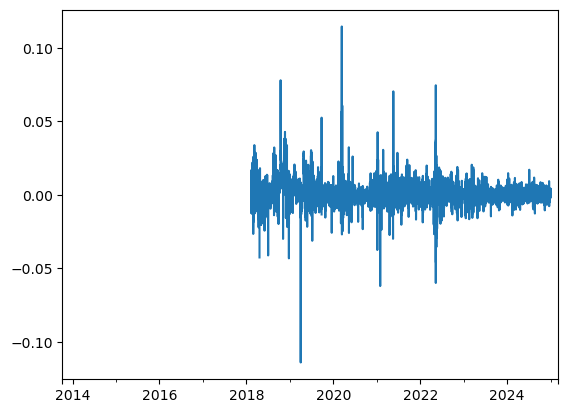

In [ ]:
((cg_btc['close']-daily_close)/cg_btc['close']).plot()
plt.title('Closing Price difference between Kraken and CoinGecko')

In [26]:
((cg_btc['close']-daily_close)/cg_btc['close']).mean()

0.0007484974873132547

<Axes: >

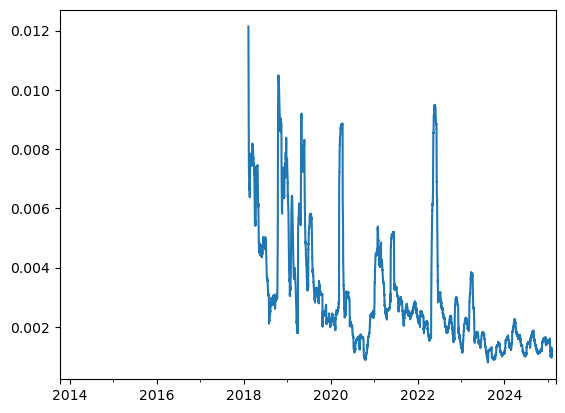

In [25]:
((cg_btc['close']-daily_close)/cg_btc['close']).rolling(24*30, min_periods = 24).std().plot()

Most of the difference seems to have been arbed away. Using Kraken data should be fine for the most part, but results from strategy testing in 2018-2020 you would need to be careful